In [ ]:
import pandas as 
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("always")
import helpers
%matplotlib inline


In [4]:
# latest_backtest = max(os.listdir('backtests'), key=lambda x: os.path.getmtime(os.path.join('backtests', x)))
# content = open(os.path.join('backtests', latest_backtest), 'r').readlines()
chosen_backtest = "round1.log"
content = open(os.path.join('backtests', chosen_backtest), 'r').readlines()

C:\Users\corin\AppData\Local\Temp\ipykernel_16132\1360508012.py:4: ResourceWarning: unclosed file <_io.TextIOWrapper name='backtests\\round1.log' mode='r' encoding='cp65001'>
  content = open(os.path.join('backtests', chosen_backtest), 'r').readlines()


In [5]:
trades_df, activity_logs_df, sandbox_logs = helpers.wrangle_backtest(content)

In [34]:
trades_df['symbol'].unique()

array(['AMETHYSTS', 'STARFRUIT'], dtype=object)

In [11]:
print(trades_df.columns)

Index(['timestamp', 'buyer', 'seller', 'symbol', 'currency', 'price',
       'quantity'],
      dtype='object')


In [ ]:
instrument = "STARFRUIT"

ob = activity_logs_df[activity_logs_df['product'] == instrument]
trades = trades_df[trades_df['symbol'] == instrument]

my_buys = trades_df[trades_df['buyer'] == 'SUBMISSION']
my_sells = trades_df[trades_df['seller'] == 'SUBMISSION']

In [35]:


trades['total'] = trades['price'].astype(float) * trades['quantity'].astype(float)



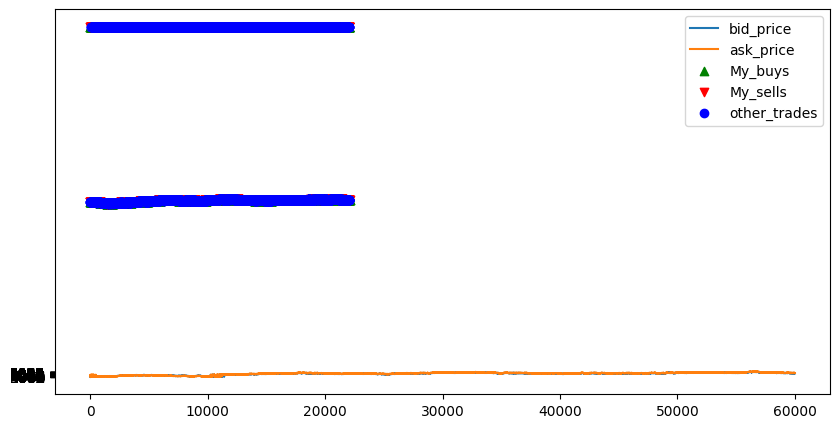

In [16]:

plt.figure(figsize=(10, 5))
plt.plot(ob['bid_price_1'], label='bid_price')
plt.plot(ob['ask_price_1'], label='ask_price')
plt.scatter(my_buys.index, my_buys['price'], label='My_buys', color='green', marker='^')
plt.scatter(my_sells.index, my_sells['price'], label='My_sells', color='red', marker='v')
plt.scatter(other_trades.index, other_trades['price'], label='other_trades', color='blue', marker='o')
plt.legend()
plt.show()


This plot shows our team's buy and sell orders compared to the overall market bid and ask prices.

In [18]:
cols_to_convert = ['bid_price_1', 'ask_price_1', 'bid_price_2', 'ask_price_2', 'bid_volume_1', 'ask_volume_1']

for col in cols_to_convert:
    ob.loc[:, col] = pd.to_numeric(ob[col], errors="coerce")

In [21]:

ob["mid"] = (ob["bid_price_1"] + ob["ask_price_1"]) / 2
ob["mid_lev2"]= (ob["bid_price_2"] + ob["ask_price_2"]) / 2
ob["weighted_mid"]= (ob["bid_price_1"] * ob["bid_volume_1"] + ob["ask_price_1"] * ob["ask_volume_1"])/ (ob["bid_volume_1"]+ob["ask_volume_1"])
ob["mid_fv_divergance"] = ob["mid_lev2"] - ob["mid"]

C:\Users\corin\AppData\Local\Temp\ipykernel_16132\2266191530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ob["mid"] = (ob["bid_price_1"] + ob["ask_price_1"]) / 2
C:\Users\corin\AppData\Local\Temp\ipykernel_16132\2266191530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ob["mid_lev2"]= (ob["bid_price_2"] + ob["ask_price_2"]) / 2
C:\Users\corin\AppData\Local\Temp\ipykernel_16132\2266191530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

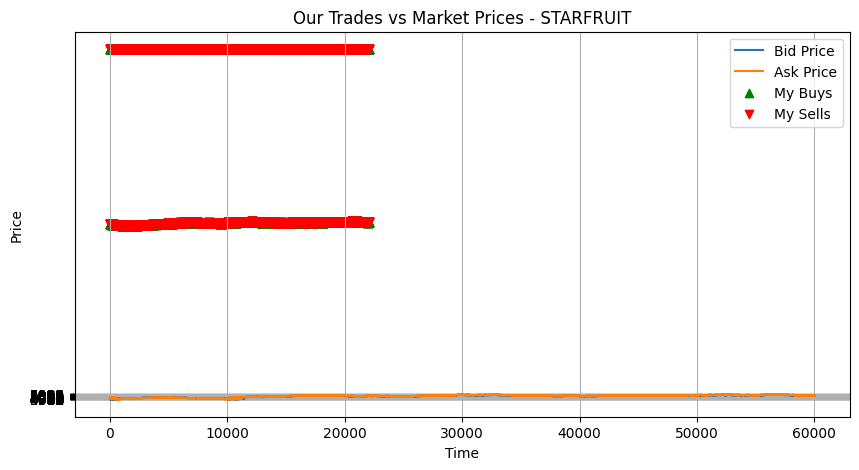

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(ob['bid_price_1'], label='Bid Price')
plt.plot(ob['ask_price_1'], label='Ask Price')
plt.scatter(my_buys.index, my_buys['price'], label='My Buys', color='green', marker='^')
plt.scatter(my_sells.index, my_sells['price'], label='My Sells', color='red', marker='v')
plt.legend()
plt.title("Our Trades vs Market Prices - STARFRUIT")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.show()


STARFRUIT Trading Analysis

we have looked at how we traded STARFRUIT and tried to spot good trade points. The graph shows when we bought and sold compared to the market’s prices.
From this, we could see how active and accurate we were in placing trades.

SUMMARY


We traded STARFRUIT efficiently, often close to market prices. The plotted prices show tight spreads, suggesting stable conditions. The profit from STARFRUIT was strong, confirming good execution.